In [1]:
# matplotlib과 관련된 모듈을 미리 선언
import matplotlib.pyplot as plt
import numpy as np

## Decision Tree (의사결정 나무)

- 복잡하고 이해하기 어려운 모델 원리들

- 시각적으로 쉽게 이해할 수 있는 모델은 없을까?
    - 정답은 의사결정 나무(Decision Tree) 모델!

### 실제 데이터에 적용하기

In [2]:
# 데이터 준비
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris_data = load_iris()
X = iris_data.data
y = iris_data.target


# 시각화를 위해서 특성 2개만을 사용하자.

X_train, X_test, y_train, y_test = train_test_split(iris_data.data[:,:2], iris_data.target,
                                                    stratify = iris_data.target,
                                                    shuffle = True)
X_train.shape, X_test.shape, y_train.shape

((112, 2), (38, 2), (112,))

`DecisionTreeClassifier(ciriterion, min_samples_split, min_samples_leaf, max_features, max_depth, max_leaf_nodes)`
* 사이킷런에서 제공하는 트리 기반의 분류 모델

주요 parameter:
* `criterion`: 정보 균일도 측정 방법(gini/entropy), (기본 값="gini")
* `min_samples_split`: 분할 되기 위해 필요한 최소한의 샘플 데이터 수, (기본 값=2) -> 이보다 저 적은 샘플이 있는 노드는 더 이상 분할되지 않습니다.
* `min_samples_leaf`: 노드가 되기 위해 필요한 최소한의 데이터 수, (기본 값=1) -> 불균형한 분할을 방지합니다. 분할 이후 한 쪽 가지에 샘플 수가 이 값보다 적게 되면 분할이 허용되지 않습니다.
* `max_features`: 분할 시 고려해야 할 최대 피처 개수, (기본 값=None)
* `max_depth`: 트리의 최대 깊이, (기본 값=None)
* `max_leaf_nodes`: 말단 노드의 개수, (기본 값=None)

'min_samples_split', 'min_samples_leaf', 'max_depth'는 과적합을 제어하는 데에 사용되는 parameter이다.

참고: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [3]:
# 결정나무 모델을 불러와 학습시키세요
# 조건 : critetion = "gini", max_depth = 1

from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=0).fit(X_train, y_train)

In [4]:
# 학습데이터 스코어와 테스트 데이터 스코어를 확인하세요

print(f'train score : {model_dt.score(X_train, y_train):.3f}')
print(f'test socre : {model_dt.score(X_test, y_test):.3f}')

train score : 0.634
test socre : 0.605


트리를 시각화해봅시다.

In [5]:
from sklearn.tree import export_graphviz
export_graphviz(model_dt, out_file = 'tree.dot', class_names = iris_data.target_names,
                feature_names = iris_data.feature_names[:2], filled = True)

In [6]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
import graphviz

with open('tree.dot') as f:
  dot_graph = f.read()
  
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

- samples : 각 노드에 적힌 samples는 각 노드에 있는 샘플의 수
- value는 클래스당 샘플의 수

In [8]:
import numpy as np

def model_border(model, X, y, contour=True):
    xmin = X[:,0].min()
    xmax = X[:,0].max()
    ymin = X[:,1].min()
    ymax = X[:,1].max()
    
    xminmax = np.arange(xmin, xmax, .02)
    yminmax = np.arange(ymin, ymax, .02)
    X1, X2 = np.meshgrid(xminmax, yminmax)
    X_pred = np.c_[X1.ravel(), X2.ravel()]  # 배열 붙이기
    
    Z = model.predict(X_pred).reshape(X1.shape)
    
    plt.figure(figsize=(10,5))
    if contour:
        plt.contour(X1, X2, Z, alpha=0.3)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=0.5)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=0.5)
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "y^", alpha=0.5)
    plt.xlim([xmin-0.2, xmax+0.2])
    plt.ylim([ymin-0.2, ymax+0.2])
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

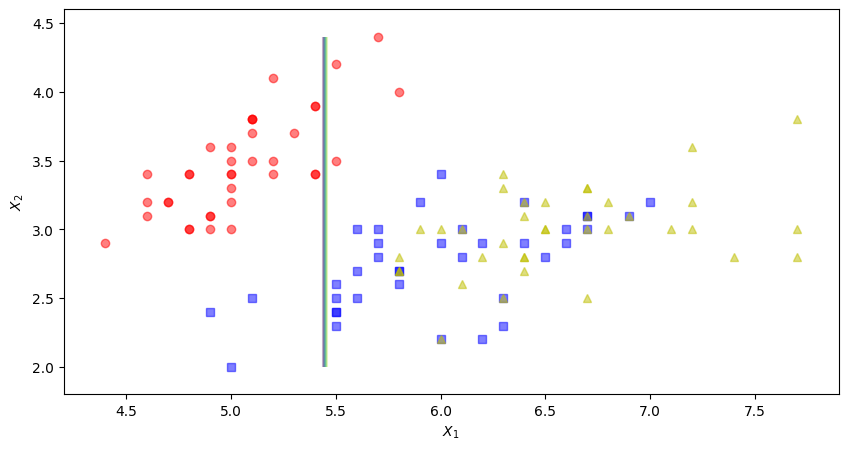

In [9]:
model_border(model_dt, X_train, y_train)

결정트리의 경계가 제대로 형성되지 않았다.

#### MaxDepth 6


In [10]:
X_train.shape, y_train.shape, X_test.shape

((112, 2), (112,), (38, 2))

In [11]:
# 결정나무 모델을 불러와 학습시키세요
# 조건 : critetion = "gini", max_depth = 6
model_dt = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)
model_dt.fit(X_train, y_train)
model_dt_nonmax = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=0)
model_dt_nonmax.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
from sklearn.tree import export_graphviz
export_graphviz(model_dt, out_file = 'tree2.dot', class_names = iris_data.target_names,
                feature_names = iris_data.feature_names[:2], filled = True)

In [13]:
import graphviz

with open('tree2.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [14]:
print(f'train score : {model_dt.score(X_train, y_train):.3f}')
print(f'test socre : {model_dt.score(X_test, y_test):.3f}')
print(f'train score : {model_dt_nonmax.score(X_train, y_train):.3f}')
print(f'test socre : {model_dt_nonmax.score(X_test, y_test):.3f}')

train score : 0.821
test socre : 0.711
train score : 0.920
test socre : 0.711


max_depth를 6로 설정한 결과이다. 이전의 모델보다 깊게 설정한 결과 과적합이 발생했다.

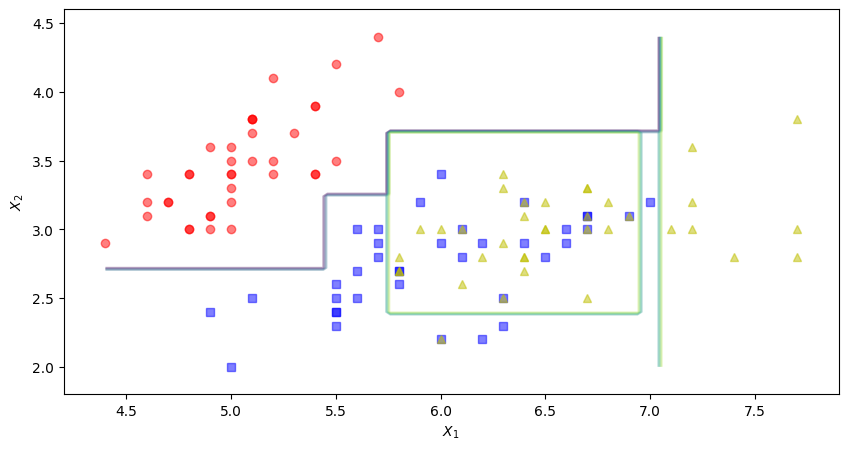

In [15]:
model_border(model_dt, X_train, y_train)

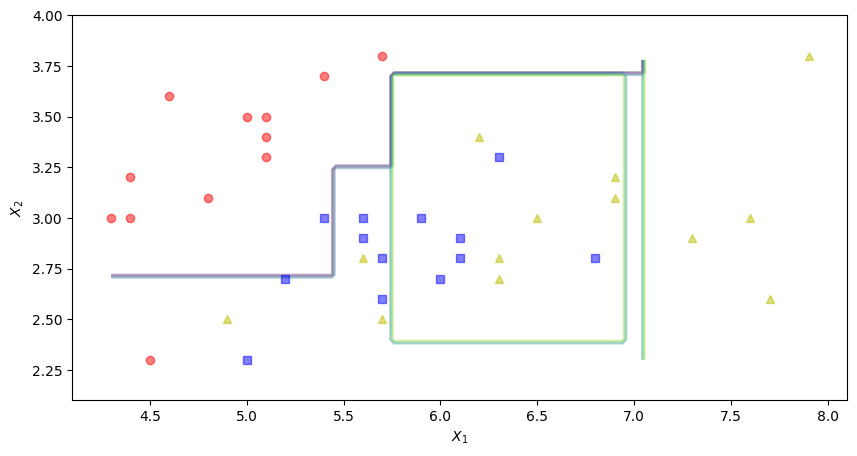

In [16]:
model_border(model_dt, X_test, y_test)

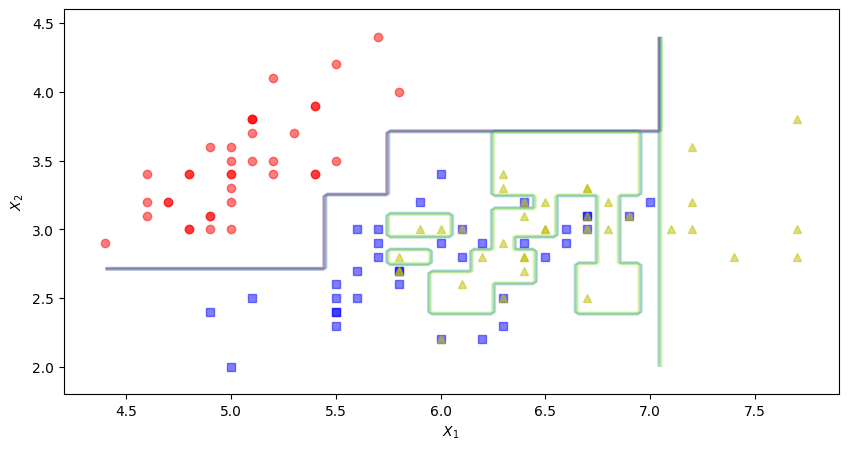

In [17]:
model_border(model_dt_nonmax, X_train, y_train)

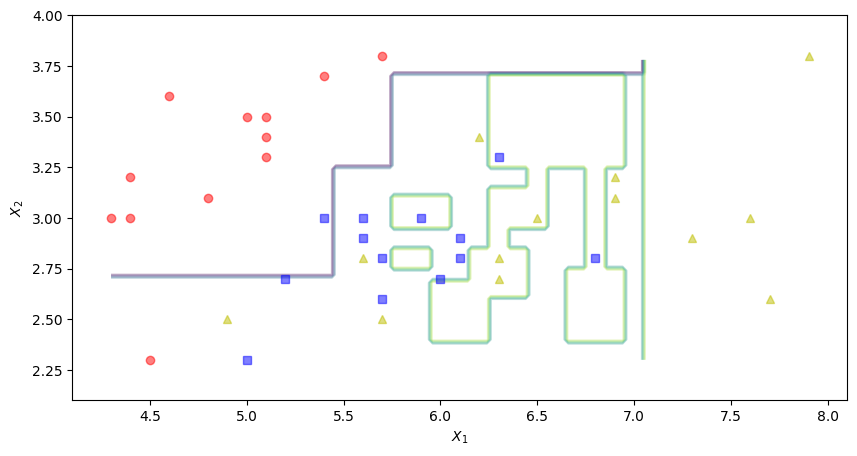

In [18]:
model_border(model_dt_nonmax, X_test, y_test)

위에서는 시각화를 위해 2가지 특성만 사용했습니다. 이제 전체 특성을 모두 사용해봅시다.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target)

model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)
model_dt.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [28]:
print(f'train score : {model_dt.score(X_train, y_train):.3f}')
print(f'test socre : {model_dt.score(X_test, y_test):.3f}')

train score : 1.000
test socre : 0.947


In [29]:
model_dt.feature_importances_

array([0.01555101, 0.01555101, 0.07047169, 0.89842628])

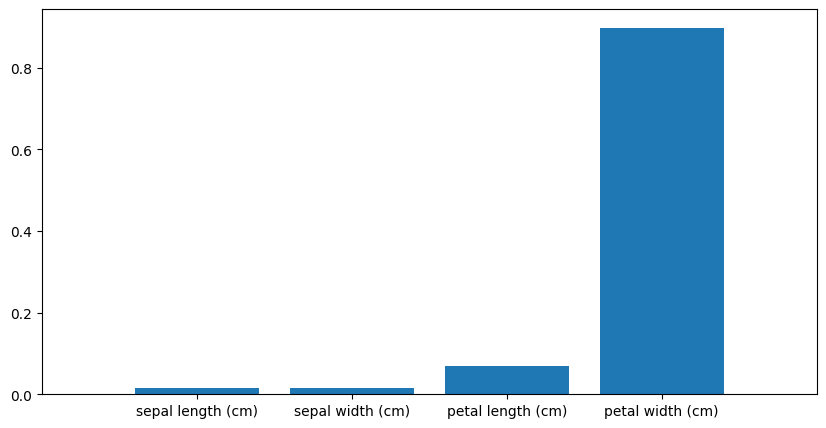

In [30]:
# 특성 중요도 그래프 그리기
plt.figure(figsize =(10,5))
plt.bar(np.arange(iris_data.data.shape[1]),model_dt.feature_importances_)

plt.xticks(np.arange(iris_data.data.shape[1]), iris_data.feature_names)
plt.xlim(-1, iris_data.data.shape[1])
plt.show()

- sepal length 특성은 트리모델에서 전혀 사용되지 않았으며, 가장 중요한 특성은 petal width

#### GridSearchCV

- 그렇다면 최적의 모델은 어떻게 찾을 수 있을까?

In [32]:
from sklearn.model_selection import GridSearchCV

# Decision Tree 객체 생성
DTC = DecisionTreeClassifier(random_state=41, )

# param_grid 설정
dtc_param_grid = {
            "criterion" : ["gini", "entropy"],
            "max_depth" :   [2, 3, 4, 5,  6, 7, 8],
            "min_samples_leaf" : [1, 3, 5, 7]
            }

# Grad Search 객체 생성
gsDTC = GridSearchCV(DTC,
                     param_grid = dtc_param_grid,
                     cv=4,
                     scoring="accuracy",
                     n_jobs= 4,
                     verbose = 1)

# Grid Search 실행
gsDTC.fit(X_train,y_train)

Fitting 4 folds for each of 56 candidates, totalling 224 fits


,estimator,DecisionTreeC...ndom_state=41)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, ...], 'min_samples_leaf': [1, 3, ...]}"
,scoring,'accuracy'
,n_jobs,4
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [33]:
# 최적의 파라미터 조합 출력
DTC_best = gsDTC.best_estimator_
print(DTC_best)

# 최고 점수(accuracy) 출력
print(gsDTC.best_score_)

DecisionTreeClassifier(max_depth=2, random_state=41)
0.9732142857142858


In [34]:
DTC_best.feature_importances_

array([0.        , 0.        , 0.54894689, 0.45105311])

In [35]:
print(DTC_best.score(X_train, y_train))
print(DTC_best.score(X_test, y_test))

0.9732142857142857
0.9210526315789473


## 모델링 실습

In [36]:
from sklearn.datasets import load_wine

data = load_wine()

In [24]:
# EDA

In [25]:
# 전처리

In [26]:
# 모델링

In [27]:
# 성능평가